Dieses Material ist lizensiert unter der Lizemz <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a> <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>.

<h2>
    Implizit definierte 4-dimensionale "Flächen"
</h2>
Wir betrachten nun die Situation eines Wesens in einem 3-dimensionalen Raum $R$ - nennen wir es R3D3 - der sich linear durch einen 4-dimensionalen Raum bewegt und dabei mit der Mannigfaltigkeit zusammenstößt, die durch die folgende Gleichung $Fl$ definiert ist.

In [1]:
var('d,p,q,r,u,v,x,y')
assume(x,'real');assume(y,'real');assume(u,'real');assume(v,'real')
dmin=-2;dmax=2
pmin=-4;pmax=4
qmin=-4;qmax=4
rmin=-4;rmax=4
xmin=-2;xmax=2
ymin=-2;ymax=2
umin=-2;umax=2
vmin=-2;vmax=2
# Ändern Sie das Folgende, um eine andere Definition zu verwenden
f(x,y,u,v)=x^3-y^3+u^2-v^2-2
#f(x,y,u,v)=x^2+y^2+u^2+v^2-1
Fl=f(x,y,u,v)==0
show(LatexExpr("Fl: "),Fl)
def N3(x): return N(x,digits=3)

Fl:  x^3 - y^3 + u^2 - v^2 - 2 == 0

Wir bestimmen als erstes die Bewegungsrichtung von $R$ durch einen Normalenvektor.

In [2]:
@interact
def _(n_x1=slider(xmin,xmax,default=1,label="$n_x$",step_size=0.1),n_y1=slider(ymin,ymax,default=1,label="$n_y$",step_size=0.1),n_u1=slider(umin,umax,default=1,label="$n_u$",step_size=0.1),n_v1=slider(vmin,vmax,default=1,label="$n_v$",step_size=0.1)):
    global n_x
    n_x=n_x1
    global n_y
    n_y=n_y1
    global n_u
    n_u=n_u1
    global n_v
    n_v=n_v1
    global vn
    vn=vector([n_x,n_y,n_u,n_v])
    show(LatexExpr("\\vec{n} = \\begin{pmatrix} n_x \\\\ n_y \\\\ n_u \\\\n_v\\end{pmatrix} ="),latex(n(vn.column(),digits=2)))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjJmMTNmOThkZTg+IHdpdGggNCB3aWRnZXRzCiAgbl94MTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmFsdWU9MS4wLCBkZXPigKY=


Die Norm und der Einheitsvektor von $\vec{n}$ ergeben sich daraus:

In [3]:
d_n=vn.norm()
e_n=(1/d_n)*vn
e_nx=e_n[0]; e_ny=e_n[1]; e_nu=e_n[2]; e_nv=e_n[3]
show(LatexExpr("d_n="),N(d_n,digits=3),LatexExpr(", \\vec{e_n}="),N3(e_n.column()))

d_n= 2.00 , \vec{e_n}= [0.500]
[0.500]
[0.500]
[0.500]

Die folgenden Vektoren ergänzen den Vektor $\vec{e_n}$ zu einer Basis des 4-dimensionalen Raums.

In [4]:
M_n=matrix(RR,e_n.column())
B=M_n.kernel().basis()
a_1=B[0];a_2=B[1]; a_3=B[2]
show(LatexExpr("\\vec{a_1}="),N3(a_1.column()),LatexExpr(",\\vec{a_2}="),N3(a_2.column()),LatexExpr(",\\vec{a_3}="),N3(a_3.column()))

\vec{a_1}= [ 1.00]
[0.000]
[0.000]
[-1.00] ,\vec{a_2}= [0.000]
[ 1.00]
[0.000]
[-1.00] ,\vec{a_3}= [0.000]
[0.000]
[ 1.00]
[-1.00]

Aus diesen 3 Vektoren berechnen wir ein Orthonormalsystem, das den selben Raum aufspannt.

In [5]:
BB,CC=matrix(RDF,B).gram_schmidt(orthonormal=True)
b_1=BB[0]; b_2=BB[1]; b_3=BB[2]
b_1x=b_1[0];b_1y=b_1[1];b_1u=b_1[2]; b_1v=b_1[3]
b_2x=b_2[0];b_2y=b_2[1];b_2u=b_2[2]; b_2v=b_2[3]
b_3x=b_3[0];b_3y=b_3[1];b_3u=b_3[2]; b_3v=b_3[3]
show(LatexExpr("\\vec{b_1}="),N3(b_1.column()),LatexExpr(",\\vec{b_2}="),N3(b_2.column()),LatexExpr(",\\vec{b_3}="),N3(b_3.column()))

\vec{b_1}= [-0.707]
[-0.000]
[-0.000]
[ 0.707] ,\vec{b_2}= [ 0.408]
[-0.816]
[ 0.000]
[ 0.408] ,\vec{b_3}= [ 0.289]
[ 0.289]
[-0.866]
[ 0.289]

Die Richtungsvektoren vom Endpunkt von $\vec{n}$ zu $\vec{n}+\vec{b_1}, \vec{n}+\vec{b_2}, \vec{n}+\vec{b_3}$ bilden dann ein Koordinatensystem $K_n$, dessen Koordinatenachsen im 3-dimensionalen Raum $R$ von R3D3 liegen.  
Ein Punkt $P$ in $R$, der bezüglich $K_n$ eine Darstellung $\begin{pmatrix}p \\ q \\ r\end{pmatrix}$ hat, hat in dem Othonormalsystem für den 4-dimensionalen Raum, das aus $K_{n}$ durch Ergänzung um den Richtungsvektor vom Endpunkt von $\vec{n}$ nach $\vec{n}+\vec{e_n}$ ergänzten Vektor entsteht, die Darstellung $\begin{pmatrix}p \\ q \\ r \\0\end{pmatrix}$. Wir können die Koordinaten von $P$ im kanonischen Koordinatensystem als $\vec{n}+\begin{pmatrix} \vec{b_1} & \vec{b_2} & \vec{b_3} & \vec{e_n}\end{pmatrix}\cdot\begin{pmatrix}p \\ q \\ r \\ 0\end{pmatrix}$ berechnen.  
Bewegt sich $R$ in Richtung des Normalenvektors $\vec{n}=d_n\vec{e_n}$ durch den Raum, so nimmt die Koordinatentransformation von $K_n$ in das Standard-Koordinatensystem des 4-dimensionalen Raumes - für einen variablen Abstand d vom Ursprung - die folgende Form an.
$$
P_x(d,p,q,r)=d\cdot e_{nx}+b_{1x}p+b_{2x}q+b_{3x}r \\
P_y(d,p,q,r)=d\cdot e_{ny}+b_{1y}p+b_{2y}q+b_{3y}r \\
P_u(d,p,q,r)=d\cdot e_{nu}+b_{1u}p+b_{2u}q+b_{3u}r \\
P_v(d,p,q,r)=d\cdot e_{nv}+b_{1v}p+b_{2v}q+b_{3v}r
$$ 

In [6]:
P_x(d,p,q,r)=d*e_nx+b_1x*p+b_2x*q+b_3x*r
P_y(d,p,q,r)=d*e_ny+b_1y*p+b_2y*q+b_3y*r
P_u(d,p,q,r)=d*e_nu+b_1u*p+b_2u*q+b_3u*r
P_v(d,p,q,r)=d*e_nv+b_1v*p+b_2v*q+b_3v*r

Betrachten wir nun die durch $Fl$ in $R$ im $(p,q,r)$-System implizit definierte Mannigfaltigkeit. Dazu ersetzen wir in $Fl$ die Variablen $x,y,u,v$ durch diese $P_x,\ldots,P_v$. Damit sehen Sie nun eine graphische Darstellung des Durchschnitts der Mannigfaltigkeit mit dem 3-dimensionalen Raum. Falls Sie nichts oder nur eine Fehlermeldung sehen, so ist dieser Durchschnitt gerade leer. Verschieben Sie in diesem Fall die Position von $R$ mit dem Schieberegler.

In [7]:
show(LatexExpr("Fl: "),Fl)
@interact
def _(d1=slider(dmin,dmax,default=d_n,label="$d_n$",step_size=0.1)):
    global d_n
    d_n=d1
    Fl_L(p,q,r)=f(P_x(d1,p,q,r), P_y(d1,p,q,r), P_u(d1,p,q,r),P_v(d1,p,q,r))
    show(implicit_plot3d(Fl_L(p,q,r)==0,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax)),viewer="threejs")

Fl:  x^3 - y^3 + u^2 - v^2 - 2 == 0

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjJkMTg3Mzg3NTg+IHdpdGggMSB3aWRnZXQKICBkMTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmFsdWU9Mi4wLCBkZXNjcmnigKY=


Hier können Sie den Durchgang des Raumes $R$ durch $Fl$ als Animation verfolgen. Die Berechnung kann etwas dauern.

Animation with 8 frames
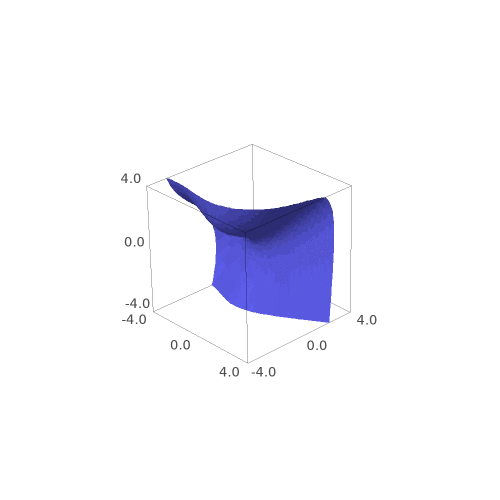

In [8]:
frames=[implicit_plot3d(f(P_x(d1,p,q,r), P_y(d1,p,q,r), P_u(d1,p,q,r),P_v(d1,p,q,r))==0,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax)) for d1 in sxrange(dmin,dmax,0.5)]
anim=animate(frames)
show(anim)